# **Análisis Exploratorio DataSet SuperStore**

*Autor:* Yeimy Lorena Lozano Clavijo
*Fecha:* Enero 2026

## **Objetivo**

Analizar el comportamiento de las ventas para identificar patrones en productos, categorias, regiones o segmentos de clientes, generando oportunidades de mejora mediante el análisis exploratorio.

##1. Importación de librerías

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Cargue y visualización de la base de datos


In [144]:
ruta='/content/drive/MyDrive/Proyectos GitHub /2026/SuperStore/Sample - Superstore.csv'
df=pd.read_csv(ruta, sep=",", encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##3. Exploración inicial de los datos

In [145]:
# Esta base de datos se compone de 9994 filas y 21 columnas
print(f"Esta base de datos se compone de {df.shape[0]} filas y {df.shape[1]} columnas")

Esta base de datos se compone de 9994 filas y 21 columnas


In [146]:
# Nombre de columnas,tipo de dato y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [147]:
# Estadística descriptiva básica
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [148]:
#Valores nulos
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


##Observaciones iniciales
- La base de datos contiene 9994 filas y 21 columnas.
- Se observan variables numéricas y categóricas.
-En este caso la base de datos no presenta valores nulos en ninguna columna.
- Es importante revisar la variable *Profit* presenta valores negativos, lo que refleja posibles perdidas.
-Es necesario analizar la relación entre las variables *Sales*, *Discount* y *Profit*. Al igual que el listado de productos en la columna *Product Name*.
- Las variables *Order date* y *Ship Date* no son del tipo date time.

##4. Limpieza y preparación de datos

In [149]:
#Transformación de variables objet a datetime
#Mediante el atributo to_datetime transformamos la variable
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [150]:
#Verificación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [151]:
#Valores duplicado
df.duplicated().sum()

np.int64(0)

In [152]:
#Validación columnas claves
df[["Sales","Discount","Profit"]].describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


## Resultados de la limpieza
- Se transformó correctamente las variables de fecha al formato `datatime`.
- No se registra duplicados en el dataset.
- Las varibles claves presentan rangos coherentes.




##5. Análisis Exploratorio

In [153]:
#Ventas y ganancias por categorias
print("La variable Category contiene los siguientes valores")
print(df["Category"].value_counts())
print("\n")
print("En la tabla se visualiza el total de ventas y ganancias que obtuvo cada categoría")
print(df.groupby("Category")[["Sales","Profit"]].sum().sort_values(by="Profit",ascending=False))

La variable Category contiene los siguientes valores
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


En la tabla se visualiza el total de ventas y ganancias que obtuvo cada categoría
                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  719047.0320  122490.8008
Furniture        741999.7953   18451.2728


## Observaciones - Categorías

- La categoría *Technology* obtuvo mayor cantidad de ventas y ganancias.
- La categoría *Furniture* presenta un total de ventas alto, sin embargo, sus ganancias son las más bajas en comparación con las demás.

In [154]:
#Lista de descuentos realizados
print("La variable Discount contiene los siguientes valores:")
print(df["Discount"].value_counts())

La variable Discount contiene los siguientes valores:
Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64


In [155]:
# Relación descuentos y ganancia.
df.groupby("Discount")[["Profit"]].sum().sort_values(by="Profit",ascending=False)

,Profit
Discount,
0.00,320987.6032
0.20,90337.3060
0.10,9029.1770
0.15,1418.9915
0.32,-2391.1377
0.45,-2493.1111
0.60,-5944.6552
0.30,-10369.2774
0.50,-20506.4281


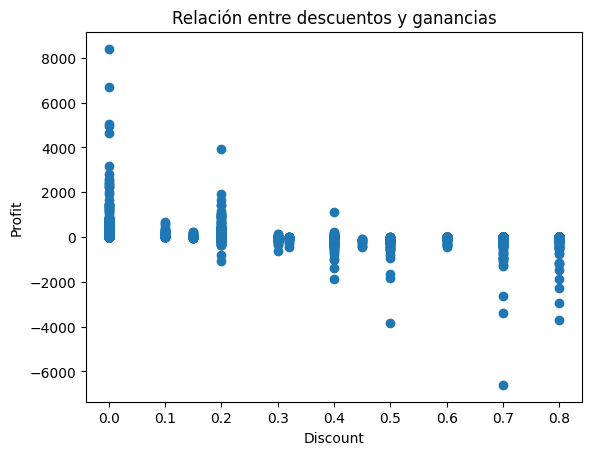

In [156]:
plt.scatter(df["Discount"],df["Profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Relación entre descuentos y ganancias")

plt.show()

## Observaciones - Descuentos vs Ganancias
### Tabla
- En la tabla se puede ver una relación importante entre los descuentos y las ganacias.
- En los descuentos nulos hubo mayor ganancia.
- Se observa que los más altos tienden a generar pérdidas en la rentabilidad de los productos.

### Gráfica
- La gráfica presenta mayor concentración en los descuentos bajos. Cuando no hay descuentos, estos tienden a mayores ganancias.
- Lo descuentos más altos presentan menor acumulación y tienden a ubicarse por debajo del 0. Lo cual se entiende como pérdidas.
- Con la gráfica se confirma lo analizado en la tabla anterior, a mayores descuentos existen pérdidas.


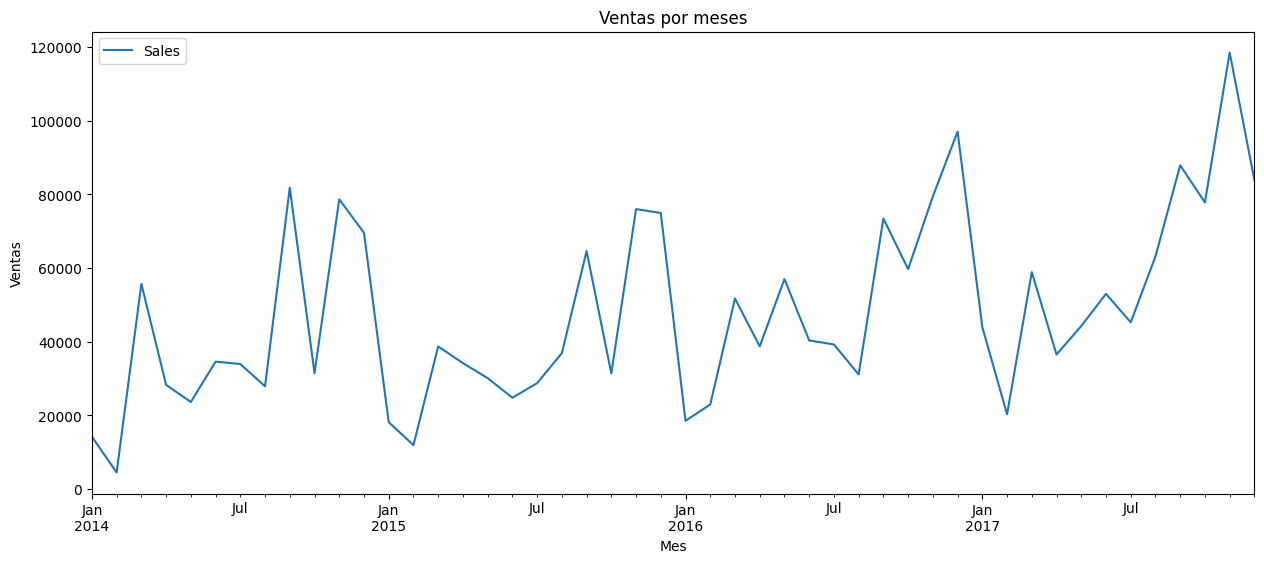

In [157]:
# Evolución de ventas por meses
# Se agrupa las ventas por mes de cada año
Ventas_mensuales= df.groupby(df["Order Date"].dt.to_period("M"))[["Sales"]].sum()
Ventas_mensuales.plot(figsize=(15,6))
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.title("Ventas por meses")
plt.show()

In [158]:
# Con .loc se extrae toda la fila asociada a la condición.
Max_venta= Ventas_mensuales.loc[Ventas_mensuales["Sales"].idxmax()]
print(Max_venta)

Sales    118447.825
Name: 2017-11, dtype: float64


## Observaciones - Ventas Mensuales
- En gráfico tiende a tener ventas bjas en las meses de enero, esto relevela coherencia en los datos pues siempre son las temporadas más bajas en compras.
- Entre 2014 y 2017 se evidencia un crecimiento favorable de las ventas en los meses de noviembre, destacándose noviembre del 2017, cuando se registraron ventas por un valor de 118447.825, siendo el mayor monto en ventas del periodo.

In [162]:
# Productos con mayores pérdidas
Productos_perdida=df.groupby("Product Name")[["Profit","Sales"]].sum().sort_values(by="Profit",ascending=True)
print(Productos_perdida)

                                                        Profit      Sales
Product Name                                                             
Cubify CubeX 3D Printer Double Head Print           -8879.9704  11099.963
Lexmark MX611dhe Monochrome Laser Printer           -4589.9730  16829.901
Cubify CubeX 3D Printer Triple Head Print           -3839.9904   7999.980
Chromcraft Bull-Nose Wood Oval Conference Table...  -2876.1156   9917.640
Bush Advantage Collection Racetrack Conference ...  -1934.3976   9544.725
...                                                        ...        ...
HP Designjet T520 Inkjet Large Format Printer -...   4094.9766  18374.895
Canon PC1060 Personal Laser Copier                   4570.9347  11619.834
Hewlett Packard LaserJet 3310 Copier                 6983.8836  18839.686
Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.0390  27453.384
Canon imageCLASS 2200 Advanced Copier               25199.9280  61599.824

[1850 rows x 2 columns]


## Observaciones - Productos con Pérdidas
- El producto *Cubify CubeX 3D Printer Double Head Print* tuvo la menor ganancia con respecto a otros produtos. Sin embargo, no fue el producto con menor cantidad de ventas.

In [175]:
#Regiones con mayores ventas y sus respectivas ganancias.
df.groupby("Region").agg({"Sales":"sum","Profit":"sum"}).sort_values(by="Sales",ascending=False)

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


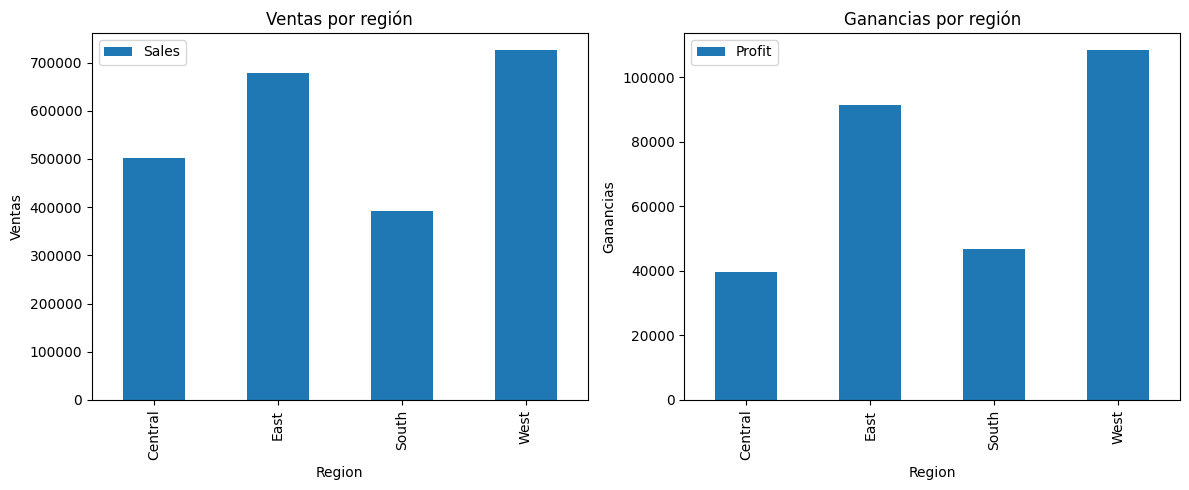

In [200]:
fig,axs = plt.subplots(ncols=2,figsize=(12,5))

ventas_region=df.groupby("Region")[["Sales"]].sum()
ganancias_region=df.groupby("Region")[["Profit"]].sum()

ventas_region.plot(kind="bar",ax=axs[0])
axs[0].set_title("Ventas por región")
axs[0].set_ylabel("Ventas")

ganancias_region.plot(kind="bar",ax=axs[1])
axs[1].set_title("Ganancias por región")
axs[1].set_ylabel("Ganancias")

plt.tight_layout()
plt.show()

## Observaciones - Ventas por Región
-  Se observa tanto en la tabla como en las gráficas que las regiones con mayores ventas tienen mayores ganancias.
- La región *West* muestra una alta rentabilidad, tanto en las ventas como en las ganacias, lo que la convierte en un foco clave para la esatbilidad y el crecimiento dentro del mercado.